<a href="https://colab.research.google.com/github/dewidiah1212/Mini-Project--1/blob/main/Dewi%20Diah%20Pontisari_MiniProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Dewi Diah Pontisari /**
**NIM  :** **201012320021**

# **Klasifikasi tiap CP**

In [24]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

num_files = 3
file_paths_CPA = [f"/content/drive/MyDrive/SLO_Mini Project-1_CPA/CPA{i}.xlsx" for i in range(1, num_files+1)]
CPA = [pd.read_excel(file) for file in file_paths_CPA]
merged_CPA = pd.concat(CPA, ignore_index=True)
shuffled_CPA = merged_CPA.sample(frac=1).reset_index(drop=True)
X_CPA = shuffled_CPA[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
Y_CPA = shuffled_CPA['kelas']


num_files = 5
file_paths_CPC = [f"/content/drive/MyDrive/SLO_Mini Project-1_CPA/CPC{i}.xlsx" for i in range(1, num_files+1)]
CPC = [pd.read_excel(file) for file in file_paths_CPC]
merged_CPC = pd.concat(CPC, ignore_index=True)
shuffled_CPC = merged_CPC.sample(frac=1).reset_index(drop=True)
X_CPC = shuffled_CPC[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
Y_CPC = shuffled_CPC['kelas']

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Klasifikasi DATASET**

In [15]:
import pandas as pd

print("First few rows of the dataset CPA:")
print(merged_CPA.head())
summary_stats_CPA = merged_CPA.describe()
class_distribution_CPA = merged_CPA['kelas'].value_counts()
summary_table_CPA = pd.concat([summary_stats_CPA, class_distribution_CPA.rename('Class Distribution')], axis=1)
print("\nSummary Table_CPA:")
print(summary_table_CPA)


print("First few rows of the dataset CPC:")
print(merged_CPC.head())
summary_stats_CPC = merged_CPC.describe()
class_distribution_CPC = merged_CPC['kelas'].value_counts()
summary_table_CPC = pd.concat([summary_stats_CPC, class_distribution_CPC.rename('Class Distribution')], axis=1)
print("\nSummary Table_CPC:")
print(summary_table_CPC)

First few rows of the dataset CPA:
     powLv1    powLv2    powLv3    powLv4    powLv5 kelas
0  0.446692  0.220117  0.144672  0.106003  0.082516     A
1  0.442455  0.219658  0.145039  0.107494  0.085354     A
2  0.446993  0.220535  0.144443  0.105565  0.082465     A
3  0.457090  0.221898  0.141954  0.101666  0.077392     A
4  0.447407  0.220674  0.143812  0.105975  0.082134     A

Summary Table_CPA:
           powLv1      powLv2      powLv3      powLv4      powLv5  \
count  700.000000  700.000000  700.000000  700.000000  700.000000   
mean     0.448182    0.220864    0.144102    0.105245    0.081607   
std      0.005319    0.001008    0.001047    0.002236    0.003096   
min      0.438026    0.218945    0.140003    0.098109    0.070169   
25%      0.444452    0.220191    0.143452    0.103718    0.079350   
50%      0.447068    0.220675    0.144344    0.105705    0.082278   
75%      0.451886    0.221484    0.144854    0.106833    0.083615   
max      0.465233    0.225529    0.145960    

# **Klasifikasi dengan menggunakan scenario: 75% training, 25% testing**

,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
0,CPA,SVM,0.428571,0.666667,0.428571,0.257143
1,CPA,KNN,0.668571,0.822159,0.668571,0.658146
2,CPC,SVM,0.312941,0.800000,0.312941,0.149180
3,CPC,KNN,0.682353,0.919154,0.682353,0.666043


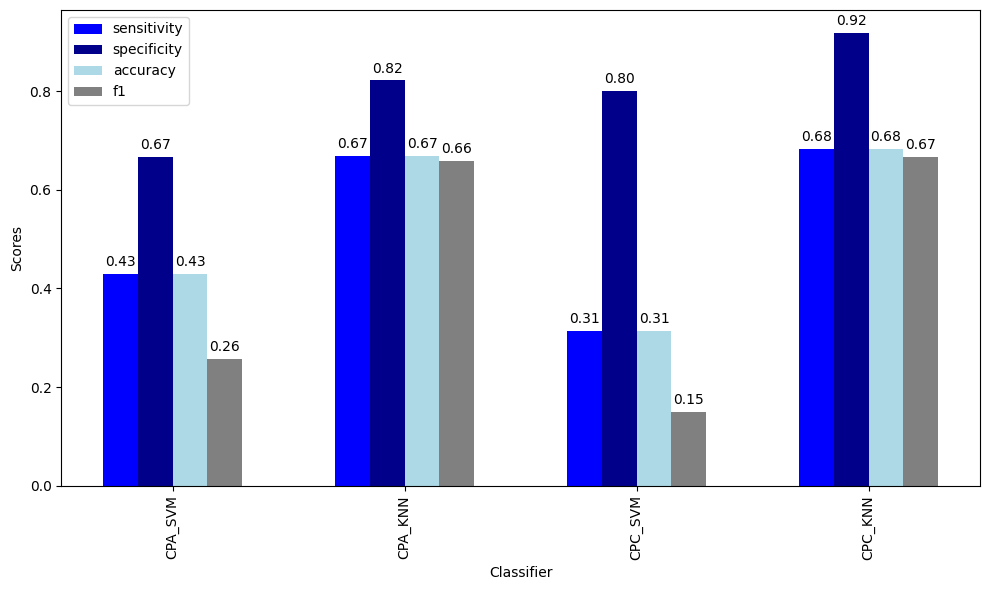

,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
3,CPC,KNN,0.682353,0.919154,0.682353,0.666043
1,CPA,KNN,0.668571,0.822159,0.668571,0.658146
0,CPA,SVM,0.428571,0.666667,0.428571,0.257143
2,CPC,SVM,0.312941,0.800000,0.312941,0.149180


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display

def skenario_75tr25ts(input_X_CPA, input_Y_CPA, input_X_CPC, input_Y_CPC, data_sel_list, classifier_mode_list):
  results = []
  for data_sel in data_sel_list:
    if data_sel == 'CPA':
      X = input_X_CPA
      Y = input_Y_CPA
    elif data_sel == 'CPC':
      X = input_X_CPC
      Y = input_Y_CPC
    for classifier_mode in classifier_mode_list:
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
      if classifier_mode == 'SVM':
        svm_classifier = SVC()
        svm_classifier.fit(X_train, Y_train)
        Y_pred = svm_classifier.predict(X_test)
      elif classifier_mode == 'KNN':
        knn_classifier = KNeighborsClassifier()
        knn_classifier.fit(X_train, Y_train)
        Y_pred = knn_classifier.predict(X_test)\

      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred, average='weighted')
      f1 = f1_score(Y_test, Y_pred, average='weighted')
      conf_matrix = confusion_matrix(Y_test, Y_pred)
      TP = conf_matrix.diagonal()
      FP = conf_matrix.sum(axis=0) - TP
      FN = conf_matrix.sum(axis=1) - TP
      TN = conf_matrix.sum() - (TP + FP + FN)
      sensitivity = TP / (TP + FN)
      specificity = TN / (TN + FP)

      results.append({
          'data_sel': data_sel,
          'classifier_mode': classifier_mode,
          'sensitivity': recall,
          'specificity': specificity.mean(),
          'accuracy': accuracy,
          'f1': f1
      })
  return pd.DataFrame(results)

data_sel_list = ['CPA', 'CPC']
classifier_mode_list = ['SVM', 'KNN']
results_df = skenario_75tr25ts(X_CPA, Y_CPA, X_CPC, Y_CPC, data_sel_list, classifier_mode_list)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(results_df))

metrics = ['sensitivity', 'specificity', 'accuracy', 'f1']
colors = ['blue', 'darkblue', 'lightblue', 'grey']

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric],
            bar_width, color=colors[i], label=metric)

    for j, value in enumerate(results_df[metric]):
        plt.text(index[j] + i * bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

sorted_result_df = results_df.sort_values(by='accuracy', ascending=False)
sorted_result_df


# **Klasifikasi dengan menggunakan scenario: 50% training, 25% validation, dan 25% testing**

,data_sel,classifier_mode,kernel_mode,accuracy
0,CPA,SVM,linear,0.445682
1,CPA,SVM,poly,0.496988
2,CPA,SVM,rbf,0.445682
3,CPA,SVM,sigmoid,0.445682
4,CPA,KNN,1,0.710377
5,CPA,KNN,7,0.620900
6,CPA,KNN,13,0.601742
7,CPA,KNN,19,0.622642
8,CPA,KNN,25,0.618940
9,CPC,SVM,linear,0.290201


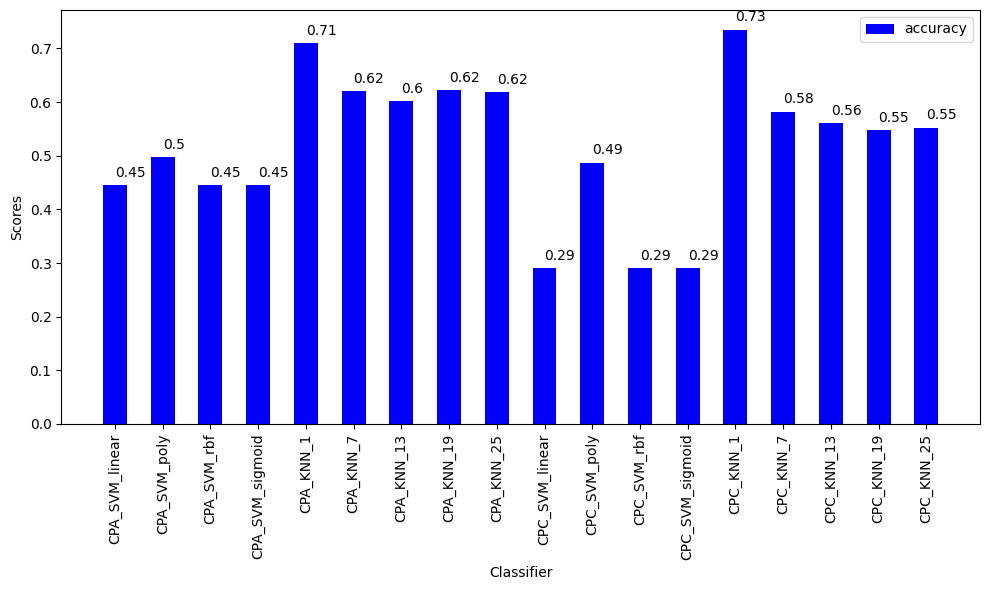

Settings for best accuracy for each data_sel:
   data_sel classifier_mode kernel_mode  accuracy
4       CPA             KNN           1  0.710377
13      CPC             KNN           1  0.734929


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display

X_CPA_trainNval, X_CPA_test, Y_CPA_trainNval, Y_CPA_test = train_test_split(X_CPA, Y_CPA, test_size=0.25, random_state=42)
X_CPC_trainNval, X_CPC_test, Y_CPC_trainNval, Y_CPC_test = train_test_split(X_CPC, Y_CPC, test_size=0.25, random_state=42)

def get_best_accuracy(data_sel_list, classifier_mode_list, svm_kernel_modes, knn_kernel_modes, fold_num):
    results = []
    for data_sel in data_sel_list:
        if data_sel == 'CPA':
            X = X_CPA_trainNval
            Y = Y_CPA_trainNval
        elif data_sel == 'CPC':
            X = X_CPC_trainNval
            Y = Y_CPC_trainNval

        for classifier_mode in classifier_mode_list:
            for kernel_mode in svm_kernel_modes if classifier_mode == 'SVM' else knn_kernel_modes:

                if classifier_mode == 'SVM':
                    svm_classifier = SVC(kernel=kernel_mode)
                    accuracy = cross_val_score(svm_classifier, X, Y, cv = fold_num)
                elif classifier_mode == 'KNN':
                    knn_classifier = KNeighborsClassifier(n_neighbors=kernel_mode)
                    accuracy = cross_val_score(knn_classifier, X, Y, cv = fold_num)

                accuracy_mean = accuracy.mean()

                results.append({
                    'data_sel': data_sel,
                    'classifier_mode': classifier_mode,
                    'kernel_mode': kernel_mode,
                    'accuracy': accuracy_mean
                })

    return pd.DataFrame(results)

data_sel_list = ['CPA', 'CPC']
classifier_mode_list = ['SVM', 'KNN']
svm_kernel_modes = ['linear', 'poly', 'rbf', 'sigmoid']
knn_kernel_modes = list(range(1, 26, 6))
fold_num = 10

results_df = get_best_accuracy(data_sel_list, classifier_mode_list, svm_kernel_modes, knn_kernel_modes, fold_num)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.5
index = np.arange(len(results_df))

metrics = ['accuracy']
colors = ['blue']

for i, metric in enumerate(metrics):
    bars = plt.bar(index + i * bar_width, results_df[metric],
                   bar_width, color=colors[i], label=metric)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}_{x['kernel_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

best_accuracy_settings = results_df.loc[results_df.groupby('data_sel')['accuracy'].idxmax()]
print("Settings for best accuracy for each data_sel:")
print(best_accuracy_settings)

,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
0,CPA,SVM,0.468571,0.701684,0.468571,0.410636
1,CPA,KNN,0.697143,0.844762,0.697143,0.708589
2,CPC,SVM,0.482353,0.859546,0.482353,0.388028
3,CPC,KNN,0.760000,0.940749,0.760000,0.753363


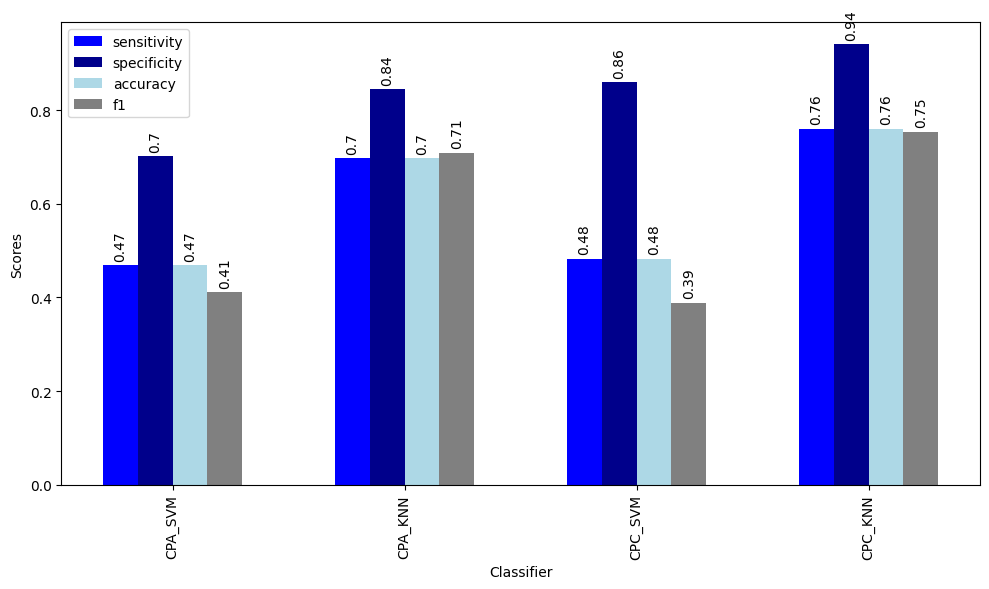

In [23]:
def skenario_knn_25ts(data_sel_list, classifier_mode_list):
  results = []
  for data_sel in data_sel_list:
    if data_sel == 'CPA':
      X_trainNval =  X_CPA_trainNval
      Y_trainNval =  Y_CPA_trainNval
      X_test = X_CPA_test
      Y_test = Y_CPA_test
    elif data_sel == 'CPC':
      X_trainNval =  X_CPC_trainNval
      Y_trainNval =  Y_CPC_trainNval
      X_test = X_CPC_test
      Y_test = Y_CPC_test
    for classifier_mode in classifier_mode_list:
      if classifier_mode == 'SVM':
        svm_classifier = SVC(kernel='poly')
        svm_classifier.fit(X_trainNval, Y_trainNval)
        Y_pred = svm_classifier.predict(X_test)
      elif classifier_mode == 'KNN':
        knn_classifier = KNeighborsClassifier(n_neighbors=1)
        knn_classifier.fit(X_trainNval, Y_trainNval)
        Y_pred = knn_classifier.predict(X_test)

      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred, average='weighted')
      f1 = f1_score(Y_test, Y_pred, average='weighted')
      conf_matrix = confusion_matrix(Y_test, Y_pred)
      TP = conf_matrix.diagonal()
      FP = conf_matrix.sum(axis=0) - TP
      FN = conf_matrix.sum(axis=1) - TP
      TN = conf_matrix.sum() - (TP + FP + FN)
      sensitivity = TP / (TP + FN)
      specificity = TN / (TN + FP)

      results.append({
          'data_sel': data_sel,
          'classifier_mode': classifier_mode,
          'sensitivity': recall,
          'specificity': specificity.mean(),
          'accuracy': accuracy,
          'f1': f1
      })
  return pd.DataFrame(results)

data_sel_list = ['CPA', 'CPC']
classifier_mode_list = ['SVM', 'KNN']
results_df = skenario_knn_25ts(data_sel_list, classifier_mode_list)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(results_df))

metrics = ['sensitivity', 'specificity', 'accuracy', 'f1']
colors = ['blue', 'darkblue', 'lightblue', 'gray']

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric],
            bar_width, color=colors[i], label=metric)
    for j, v in enumerate(results_df[metric]):
        plt.text(index[j] + i * bar_width, v + 0.01, str(round(v, 2)), ha='center', va='bottom', rotation=90)

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()